Exploratory data analysis for the Estimation of obesity levels based on eating habits and physical condition Data Set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency, pearsonr
import itertools

Function to calculate the chi2 test and the p-value doing N diferent test using a random sample of n rows.

In [2]:
# H0: no relationship between the two features

def p_vals(N, data_name, n_sample, var):
  pvalues = []
  vals = []
  for i in range(N):
    df = data_name.sample(n_sample)
    table = pd.crosstab(index = df.iloc[:, -1], columns = df[var])
    val, p, dof, ex = chi2_contingency(table, correction = False)
    pvalues.append(p)
    vals.append(val)
  p_value_mean = np.mean(pvalues)
  value_mean = np.mean(vals)
  return value_mean, p_value_mean

# Load data

## Data description

In [3]:
data_description = pd.DataFrame({'Category': ['Eating Habits', 'Eating Habits', 'Eating Habits', 'Eating Habits', 'Eating Habits', 'Eating Habits', 'Physical Conditioning', 'Physical Conditioning', 'Physical Conditioning', 'Physical Conditioning', 'Physical Conditioning', 'Responder Charateristics', 'Responder Charateristics', 'Responder Charateristics', 'Responder Charateristics', 'Responder Charateristics', 'Target Feature'],
                    'Feature Name': ['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH20', 'CALC', 'SCC', 'FAF', 'TUE', 'MTRANS', 'SMOKE', 'Family_history_with_overweight', 'Gender', 'Age', 'Height', 'Weight', 'NObesity'],
                    'Description': ['Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Consumption of water daily', 'Consumption of alcohol', 'Calories consumption monitoring', 'Pysical activity frequency', 'Time using technology devices', 'Transportation used', 'Smokes Yes or No', 'Yes or No', 'Gender is Male or Female', 'Age in years', 'Height in meters', 'Weight in kilograms', 'Based on BMI'],
                    'Feature Type': ['Categorical', 'Ordinal', 'Ordinal', 'Ordinal', 'Ordinal', 'Ordinal', 'Categorical', 'Ordinal', 'Ordinal', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Integer', 'Float', 'Float', 'Categorical']})
data_description

,Category,Feature Name,Description,Feature Type
0,Eating Habits,FAVC,Frequent consumption of high caloric food,Categorical
1,Eating Habits,FCVC,Frequency of consumption of vegetables,Ordinal
2,Eating Habits,NCP,Number of main meals,Ordinal
3,Eating Habits,CAEC,Consumption of food between meals,Ordinal
4,Eating Habits,CH20,Consumption of water daily,Ordinal
5,Eating Habits,CALC,Consumption of alcohol,Ordinal
6,Physical Conditioning,SCC,Calories consumption monitoring,Categorical
7,Physical Conditioning,FAF,Pysical activity frequency,Ordinal
8,Physical Conditioning,TUE,Time using technology devices,Ordinal
9,Physical Conditioning,MTRANS,Transportation used,Categorical


## Load data

Load the data and rename the columns.

In [4]:
data = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv')
data = data.rename(columns = {'family_history_with_overweight': 'Family_overweight', 'FAVC': 'High_cal_food', 
                              'FCVC': 'Vegetables', 'NCP': 'Number_meals','CAEC': 'Eat_between_meals', 'SMOKE': 'Smoke', 
                              'CH2O': 'Water', 'CALC': 'Alcohol', 'SCC': 'Calories_monitoring', 'FAF': 'Exercise_time', 
                              'TUE': 'Technologies_time', 'MTRANS': 'Transport_way'})
data

,Gender,Age,Height,Weight,Family_overweight,High_cal_food,Vegetables,Number_meals,Eat_between_meals,Smoke,Water,Calories_monitoring,Exercise_time,Technologies_time,Alcohol,Transport_way,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


There is no nan's

In [5]:
data.isna().sum()

Gender                 0
Age                    0
Height                 0
Weight                 0
Family_overweight      0
High_cal_food          0
Vegetables             0
Number_meals           0
Eat_between_meals      0
Smoke                  0
Water                  0
Calories_monitoring    0
Exercise_time          0
Technologies_time      0
Alcohol                0
Transport_way          0
NObeyesdad             0
dtype: int64

# Preprocesing data

First we do a round to the numerical columns and then we convert the columns to a categorical. Drop weight and height because they are used to obtain the IMC and classify each row.

In [6]:
def convert_FCVC(x):
    if x == 1:
        return 'Never'
    elif x == 2:
        return 'Sometimes'
    else:
        return 'Always'
    
def convert_NCP(x):
    if x <= 2.5:
        return 'Between 1 and 2'
    elif (x > 2.5) & (x <= 3.5):
        return 'Three'
    else:
        return 'More than three'
    
def convert_CH2O(x):
    if x == 1:
        return 'Less than a liter'
    elif x == 2:
        return 'Between 1 and 2 L'
    else:
        return 'More than 2 L'
    
def convert_FAF(x):
    if x == 0:
        return 'I do not have'
    elif x == 1:
        return '1 or 2 days'
    elif x == 2:
        return '2 or 4 days'
    else:
        return '4 or 5 days'

def convert_TUE(x):
    if x == 0:
        return '0-2 hours'
    elif x == 1:
        return '3-5 hours'
    else:
        return 'More than 5 hours'

In [7]:
columns = ['Vegetables', 'Water', 'Exercise_time', 'Technologies_time']
for col in columns:
    data[col] = round(data[col]).astype('int')
    
data['Vegetables'] = data['Vegetables'].map(lambda x: convert_FCVC(x))
data['Number_meals'] = data['Number_meals'].map(lambda x: convert_NCP(x))
data['Water'] = data['Water'].map(lambda x: convert_CH2O(x))
data['Exercise_time'] = data['Exercise_time'].map(lambda x: convert_FAF(x))
data['Technologies_time'] = data['Technologies_time'].map(lambda x: convert_TUE(x))

data['NObeyesdad'] = pd.Categorical(data['NObeyesdad'], categories = ['Insufficient_Weight', 'Normal_Weight', 
                                    'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 
                                    'Obesity_Type_III'])
data['Vegetables'] = pd.Categorical(data['Vegetables'], categories = ['Never', 'Sometimes', 'Always'])
data['Number_meals'] = pd.Categorical(data['Number_meals'], categories = ['Between 1 and 2', 'Three', 'More than three'])
data['Eat_between_meals'] = pd.Categorical(data['Eat_between_meals'], categories = ['no', 'Sometimes', 'Frequently', 'Always'])
data['Water'] = pd.Categorical(data['Water'], categories = ['Less than a liter', 'Between 1 and 2 L', 'More than 2 L'])
data['Exercise_time'] = pd.Categorical(data['Exercise_time'], categories = ['I do not have', '1 or 2 days', '2 or 4 days', 
                                        '4 or 5 days'])
data['Technologies_time'] = pd.Categorical(data['Technologies_time'], categories = ['0-2 hours', '3-5 hours', 
                                            'More than 5 hours'])
data['Alcohol'] = pd.Categorical(data['Alcohol'], categories = ['no', 'Sometimes', 'Frequently', 'Always'])

We explore the result.

In [8]:
data

,Gender,Age,Height,Weight,Family_overweight,High_cal_food,Vegetables,Number_meals,Eat_between_meals,Smoke,Water,Calories_monitoring,Exercise_time,Technologies_time,Alcohol,Transport_way,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,I do not have,3-5 hours,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,Always,Three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0-2 hours,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0-2 hours,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,Sometimes,Between 1 and 2,Sometimes,no,Between 1 and 2 L,no,I do not have,0-2 hours,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,Always,Three,Sometimes,no,More than 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity_Type_III


# Univariant analysis

We do the univariant analysis of each feature.

## NObeyesdad

First, the target feature.

In [9]:
obesidad = data['NObeyesdad']
print(np.unique(obesidad))

obesidad_counts = pd.DataFrame(obesidad.value_counts()).reset_index().reindex([6, 5, 3, 4, 0, 2, 1])
obesidad_counts = obesidad_counts.rename(columns = {'index': 'Category', 'NObeyesdad': 'Count'})

obesidad_counts

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


,Category,Count
6,Insufficient_Weight,272
5,Normal_Weight,287
3,Overweight_Level_II,290
4,Overweight_Level_I,290
0,Obesity_Type_I,351
2,Obesity_Type_II,297
1,Obesity_Type_III,324


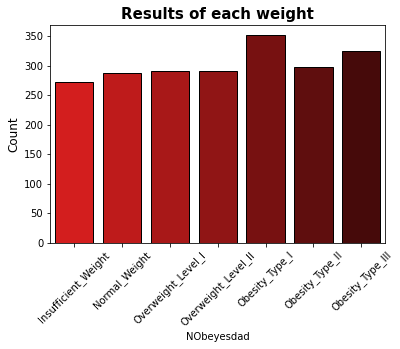

In [10]:
sns.countplot(x = "NObeyesdad", data = data, palette = "flag", edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Gender

The feature gender.

In [11]:
genero = data['Gender']
print(np.unique(genero))

genero_counts = pd.DataFrame(genero.value_counts()).reset_index()
genero_counts = genero_counts.rename(columns = {"index": "Gender", "Gender": "Count"})
genero_counts

['Female' 'Male']


,Gender,Count
0,Male,1068
1,Female,1043


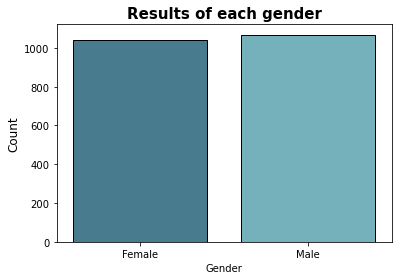

In [12]:
sns.countplot(x = 'Gender', data = data, palette = "GnBu_d", edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each gender', fontsize = 15, weight = 'bold')
plt.show()

## Family history with overweight

Feature members of the family with overweight or obesity.

In [13]:
overweigth = data['Family_overweight']
print(np.unique(overweigth))

overweigth_counts = pd.DataFrame(overweigth.value_counts()).reset_index()
overweigth_counts = overweigth_counts.rename(columns = {"index": "Family_overweigth", "Family_overweight": "Count"})
overweigth_counts

['no' 'yes']


,Family_overweigth,Count
0,yes,1726
1,no,385


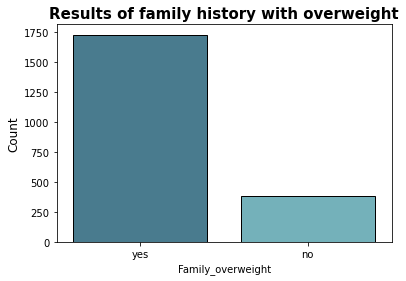

In [14]:
sns.countplot(x = 'Family_overweight', data = data, palette = "GnBu_d", edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of family history with overweight', fontsize = 15, weight = 'bold')
plt.show()

## Frequency hipercaloric food

Feature frequency of consumption of high caloric food.

In [15]:
favc = data['High_cal_food']
print(np.unique(favc))

favc_counts = pd.DataFrame(favc.value_counts()).reset_index()
favc_counts = favc_counts.rename(columns = {"index": "Freq_hipercaloric_food", "High_cal_food": "Count"})
favc_counts

['no' 'yes']


,Freq_hipercaloric_food,Count
0,yes,1866
1,no,245


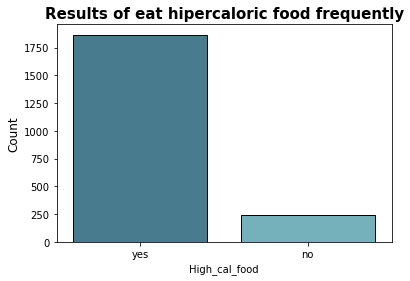

In [16]:
sns.countplot(x = 'High_cal_food', data = data, palette = "GnBu_d", edgecolor = "black", order = ['yes', 'no'])
plt.ylabel('Count', fontsize = 12)
plt.title('Results of eat hipercaloric food frequently', fontsize = 15, weight = 'bold')
plt.show()

## Frequency vegetables

Feature frequency of consumption of vegetables.

In [17]:
fcvc = data['Vegetables']
print(np.unique(fcvc))

fcvc_counts = pd.DataFrame(fcvc.value_counts()).reset_index().reindex([2, 0, 1])
fcvc_counts = fcvc_counts.rename(columns = {"index": "Freq_vegetables_food", "Vegetables": "Count"})
fcvc_counts

['Always' 'Never' 'Sometimes']


,Freq_vegetables_food,Count
2,Never,102
0,Sometimes,1013
1,Always,996


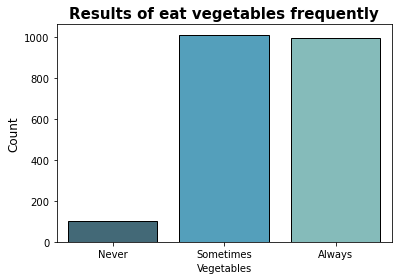

In [18]:
sns.countplot(x = 'Vegetables', data = data, palette = "GnBu_d", edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of eat vegetables frequently', fontsize = 15, weight = 'bold')
plt.show()

## Number of main meals

Feature number of main meals per day.

In [19]:
ncp = data['Number_meals']
print(np.unique(ncp))

ncp_counts = pd.DataFrame(ncp.value_counts()).reset_index().reindex([1, 0, 2])
ncp_counts = ncp_counts.rename(columns = {"index": "Number_main_meals", "Number_meals": "Count"})
ncp_counts

['Between 1 and 2' 'More than three' 'Three']


,Number_main_meals,Count
1,Between 1 and 2,492
0,Three,1470
2,More than three,149


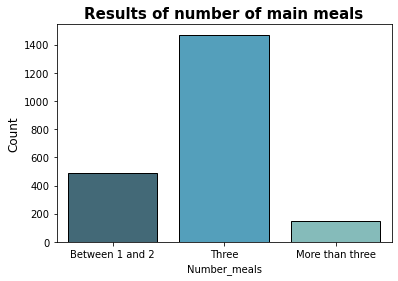

In [20]:
sns.countplot(x = 'Number_meals', data = data, palette = "GnBu_d", edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of number of main meals', fontsize = 15, weight = 'bold')
plt.show()

## Frequency eat between meals

Feature frequency of food consumption between the main meals.

In [21]:
caec = data['Eat_between_meals']
print(np.unique(caec))

caec_counts = pd.DataFrame(caec.value_counts()).reset_index().reindex([3, 0, 1, 2])
caec_counts = caec_counts.rename(columns = {'index': 'Food_consumtion_between_foods', 'Eat_between_meals': 'Count'})

caec_counts

['Always' 'Frequently' 'Sometimes' 'no']


,Food_consumtion_between_foods,Count
3,no,51
0,Sometimes,1765
1,Frequently,242
2,Always,53


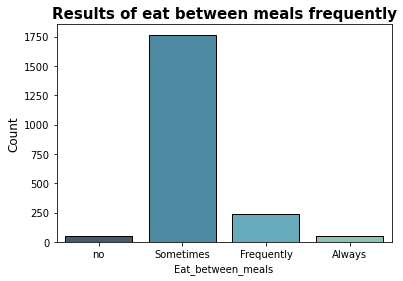

In [22]:
sns.countplot(x = 'Eat_between_meals', data = data, palette = "GnBu_d", edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of eat between meals frequently', fontsize = 15, weight = 'bold')
plt.show()

## Smoke

Feature smoke.

In [23]:
smoke = data['Smoke']
print(np.unique(smoke))

smoke_counts = pd.DataFrame(smoke.value_counts()).reset_index()
smoke_counts = smoke_counts.rename(columns = {'index': 'Smoke', 'Smoke': 'Count'})

smoke_counts

['no' 'yes']


,Smoke,Count
0,no,2067
1,yes,44


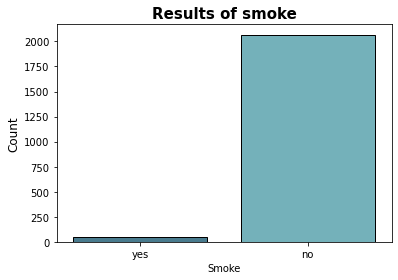

In [24]:
sns.countplot(x = 'Smoke', data = data, palette = "GnBu_d", edgecolor = "black", order = ['yes', 'no'])
plt.ylabel('Count', fontsize = 12)
plt.title('Results of smoke', fontsize = 15, weight = 'bold')
plt.show()

## Water consumption

Feature water consumption per day.

In [25]:
ch2o = data['Water']
print(np.unique(ch2o))

ch2o_counts = pd.DataFrame(ch2o.value_counts()).reset_index().reindex([2, 0, 1])
ch2o_counts = ch2o_counts.rename(columns = {'index': 'Water_consumption', 'Water': 'Count'})

ch2o_counts

['Between 1 and 2 L' 'Less than a liter' 'More than 2 L']


,Water_consumption,Count
2,Less than a liter,485
0,Between 1 and 2 L,1110
1,More than 2 L,516


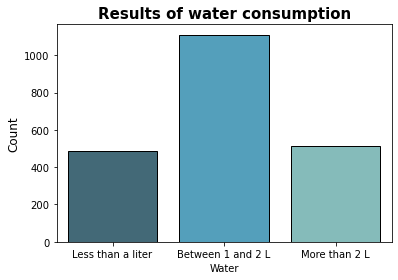

In [26]:
sns.countplot(x = 'Water', data = data, palette = "GnBu_d", edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of water consumption', fontsize = 15, weight = 'bold')
plt.show()

## Calories monitorization

Feature calories monitoring.

In [27]:
scc = data['Calories_monitoring']
print(np.unique(scc))

scc_counts = pd.DataFrame(scc.value_counts()).reset_index()
scc_counts = scc_counts.rename(columns = {'index': 'Monitoring_calories', 'Calories_monitoring': 'Count'})

scc_counts

['no' 'yes']


,Monitoring_calories,Count
0,no,2015
1,yes,96


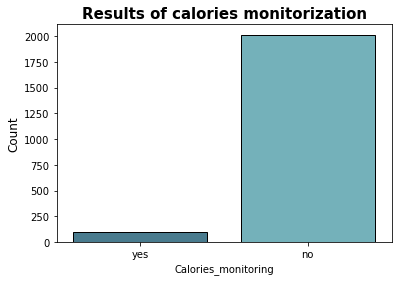

In [28]:
sns.countplot(x = 'Calories_monitoring', data = data, palette = "GnBu_d", edgecolor = "black", order = ['yes', 'no'])
plt.ylabel('Count', fontsize = 12)
plt.title('Results of calories monitorization', fontsize = 15, weight = 'bold')
plt.show()

## Exercise frequency

Feature frequency of exercise per week.

In [29]:
faf = data['Exercise_time']
print(np.unique(faf))

faf_counts = pd.DataFrame(faf.value_counts()).reset_index().reindex([1, 0, 2, 3])
faf_counts = faf_counts.rename(columns = {'index': 'Exercise_frequency', 'Exercise_time': 'Count'})

faf_counts

['1 or 2 days' '2 or 4 days' '4 or 5 days' 'I do not have']


,Exercise_frequency,Count
1,I do not have,720
0,1 or 2 days,776
2,2 or 4 days,496
3,4 or 5 days,119


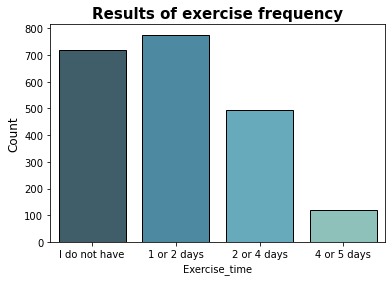

In [30]:
sns.countplot(x = 'Exercise_time', data = data, palette = "GnBu_d", edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of exercise frequency', fontsize = 15, weight = 'bold')
plt.show()

## Technology use

Feature use of technologies in hours per week.

In [31]:
tue = data['Technologies_time']
print(np.unique(tue))

tue_counts = pd.DataFrame(tue.value_counts()).reset_index()
tue_counts = tue_counts.rename(columns = {'index': 'Technology_use', 'Technologies_time': 'Count'})

tue_counts

['0-2 hours' '3-5 hours' 'More than 5 hours']


,Technology_use,Count
0,0-2 hours,952
1,3-5 hours,915
2,More than 5 hours,244


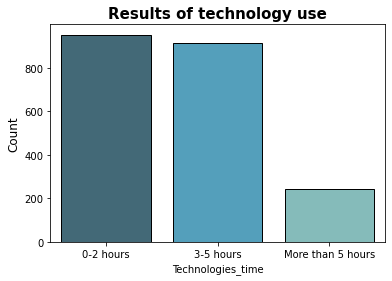

In [32]:
sns.countplot(x = 'Technologies_time', data = data, palette = "GnBu_d", edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of technology use', fontsize = 15, weight = 'bold')
plt.show()

## Alcohol consumption

Feature frequency of alcohol consumption.

In [33]:
calc = data['Alcohol']
print(np.unique(calc))

calc_counts = pd.DataFrame(calc.value_counts()).reset_index().reindex([1, 0, 2, 3])
calc_counts = calc_counts.rename(columns = {'index': 'Alcohol_consumtion', 'Alcohol': 'Count'})

calc_counts

['Always' 'Frequently' 'Sometimes' 'no']


,Alcohol_consumtion,Count
1,no,639
0,Sometimes,1401
2,Frequently,70
3,Always,1


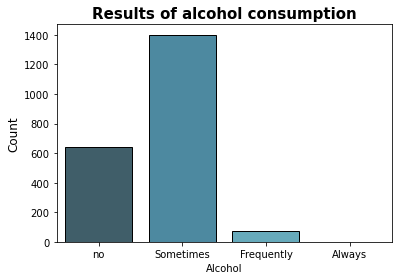

In [34]:
sns.countplot(x = 'Alcohol', data = data, palette = "GnBu_d", edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of alcohol consumption', fontsize = 15, weight = 'bold')
plt.show()

## Transport way

Feature way of transport.

In [35]:
mtrans = data['Transport_way']
print(np.unique(mtrans))

mtrans_counts = pd.DataFrame(mtrans.value_counts()).reset_index().reindex([2, 4, 0, 3, 1])
mtrans_counts = mtrans_counts.rename(columns = {'index': 'Transport', 'Transport_way': 'Count'})

mtrans_counts

['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']


,Transport,Count
2,Walking,56
4,Bike,7
0,Public_Transportation,1580
3,Motorbike,11
1,Automobile,457


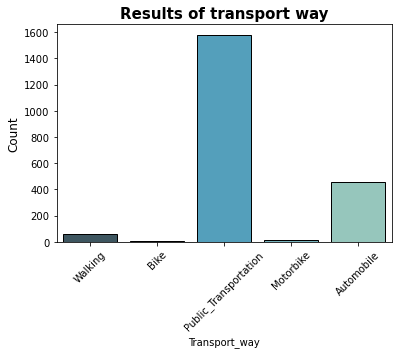

In [36]:
sns.countplot(x = 'Transport_way', data = data, palette = "GnBu_d", edgecolor = "black", order = ['Walking', 'Bike', 'Public_Transportation', 'Motorbike', 'Automobile'])
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 45)
plt.title('Results of transport way', fontsize = 15, weight = 'bold')
plt.show()

It is the unique categorical feature without order. We include 'bike' into 'walking' and 'motorbike' into 'automobile'. We obtain 3 categories: 
    - Healthy transportation (named as walking): Includes walking and bike.
    - Private transportation (named as automobile): Includes automobile and motorbike.
    - Public transportation (names as public_transportation): Includes public transportation.

In [37]:
new_data = data.copy()
new_data.Transport_way = new_data.Transport_way.apply(lambda x: 'Automobile' if x == 'Motorbike' else 
                                                      ('Walking' if x == 'Bike' else x))
new_data

,Gender,Age,Height,Weight,Family_overweight,High_cal_food,Vegetables,Number_meals,Eat_between_meals,Smoke,Water,Calories_monitoring,Exercise_time,Technologies_time,Alcohol,Transport_way,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,I do not have,3-5 hours,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,Always,Three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0-2 hours,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0-2 hours,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,Sometimes,Between 1 and 2,Sometimes,no,Between 1 and 2 L,no,I do not have,0-2 hours,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,Always,Three,Sometimes,no,More than 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity_Type_III


In [38]:
new_mtrans = new_data['Transport_way']
print(np.unique(new_mtrans))

new_mtrans_counts = pd.DataFrame(new_mtrans.value_counts()).reset_index().reindex([2, 0, 1])
new_mtrans_counts = new_mtrans_counts.rename(columns = {'index': 'Transport', 'Transport_way': 'Count'})

new_mtrans_counts

['Automobile' 'Public_Transportation' 'Walking']


,Transport,Count
2,Walking,63
0,Public_Transportation,1580
1,Automobile,468


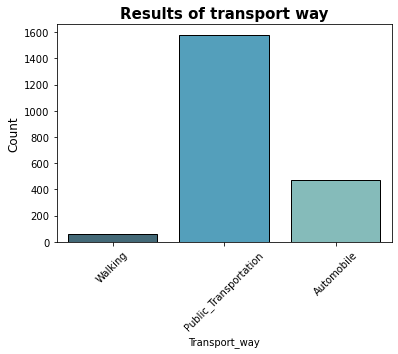

In [39]:
sns.countplot(x = 'Transport_way', data = new_data, palette = "GnBu_d", edgecolor = "black", order = ['Walking', 'Public_Transportation', 'Automobile'])
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 45)
plt.title('Results of transport way', fontsize = 15, weight = 'bold')
plt.show()

## Age

Feature age. It's the unique numerical feature.

In [40]:
data['Age'].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

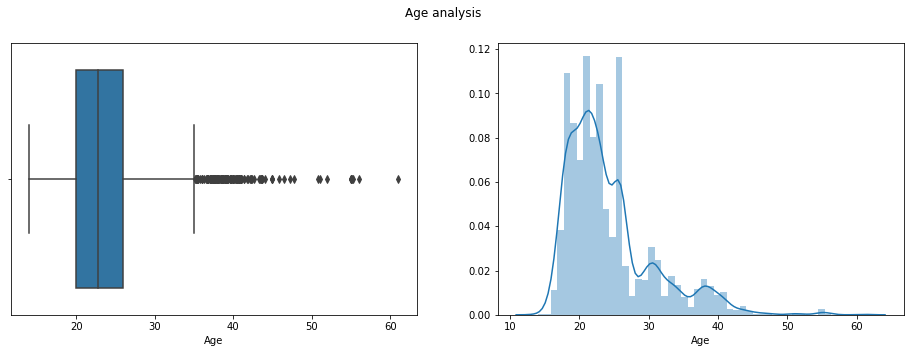

In [41]:
fig = plt.figure(figsize = (16, 5))
fig.suptitle('Age analysis')

ax1 = fig.add_subplot(121)
sns.boxplot(data['Age'])

ax1 = fig.add_subplot(122)
sns.distplot(data['Age'], kde = True)

plt.show()

# Bivariant analysis

Now we do the bivariant analysis between each feature and the target feature. For each analysis we do the chi2 test 100 times using a 300 random sample, so the limit p-value is 0.05/100

## Gender vs NObeyesdad

In [42]:
table_1 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['Gender'])
table_1

Gender,Female,Male
NObeyesdad,,
Insufficient_Weight,173,99
Normal_Weight,141,146
Overweight_Level_I,145,145
Overweight_Level_II,103,187
Obesity_Type_I,156,195
Obesity_Type_II,2,295
Obesity_Type_III,323,1


In [43]:
chi_gender, p_gender = p_vals(100, new_data, 300, 'Gender')
print(chi_gender, p_gender)

97.32784100107969 2.0473091997186096e-15


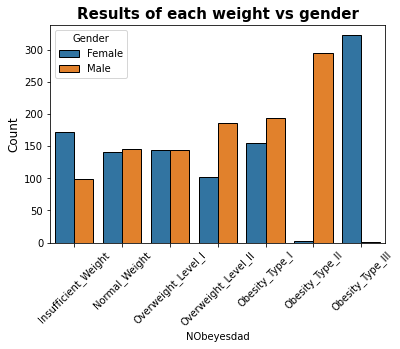

In [44]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'Gender', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs gender', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Family overweight vs NObeyesdad

In [45]:
table_2 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['Family_overweight'])
table_2

Family_overweight,no,yes
NObeyesdad,,
Insufficient_Weight,146,126
Normal_Weight,132,155
Overweight_Level_I,81,209
Overweight_Level_II,18,272
Obesity_Type_I,7,344
Obesity_Type_II,1,296
Obesity_Type_III,0,324


In [46]:
chi_family, p_family = p_vals(100, new_data, 300, 'Family_overweight')
print(chi_family, p_family)

90.69203726236596 2.878144927050429e-13


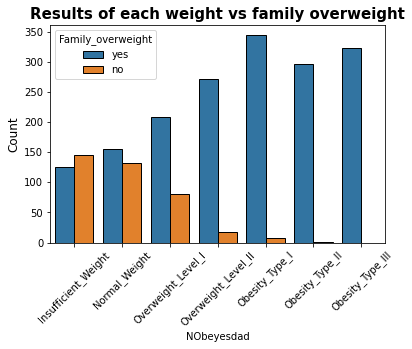

In [47]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'Family_overweight', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs family overweight', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Hipercaloric food vs NObeyesdad

In [48]:
table_3 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['High_cal_food'])
table_3

High_cal_food,no,yes
NObeyesdad,,
Insufficient_Weight,51,221
Normal_Weight,79,208
Overweight_Level_I,22,268
Overweight_Level_II,74,216
Obesity_Type_I,11,340
Obesity_Type_II,7,290
Obesity_Type_III,1,323


In [49]:
chi_high, p_high = p_vals(100, new_data, 300, 'High_cal_food')
print(chi_high, p_high)

37.597875742313406 0.00023732145671367613


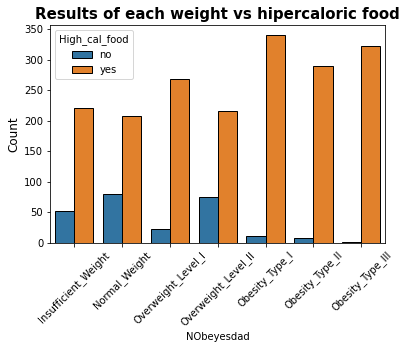

In [50]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'High_cal_food', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs hipercaloric food', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Vegetables vs NObeyesdad

In [51]:
table_4 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['Vegetables'])
table_4

Vegetables,Never,Sometimes,Always
NObeyesdad,,,
Insufficient_Weight,23,86,163
Normal_Weight,18,155,114
Overweight_Level_I,14,186,90
Overweight_Level_II,9,192,89
Obesity_Type_I,17,256,78
Obesity_Type_II,21,138,138
Obesity_Type_III,0,0,324


In [52]:
chi_veg, p_veg = p_vals(100, new_data, 300, 'Vegetables')
print(chi_veg, p_veg)

87.80277845571791 1.549452714829057e-10


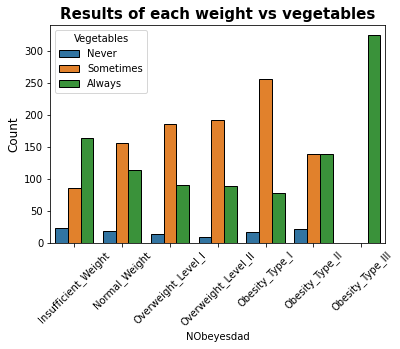

In [53]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'Vegetables', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs vegetables', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Number of meals vs NObeyesdad

In [54]:
table_5 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['Number_meals'])
table_5

Number_meals,Between 1 and 2,Three,More than three
NObeyesdad,,,
Insufficient_Weight,55,145,72
Normal_Weight,52,206,29
Overweight_Level_I,99,158,33
Overweight_Level_II,100,184,6
Obesity_Type_I,126,225,0
Obesity_Type_II,60,228,9
Obesity_Type_III,0,324,0


In [55]:
chi_nummels, p_nummels = p_vals(100, new_data, 300, 'Number_meals')
print(chi_nummels, p_nummels)

69.33102352731161 4.4819877034563475e-07


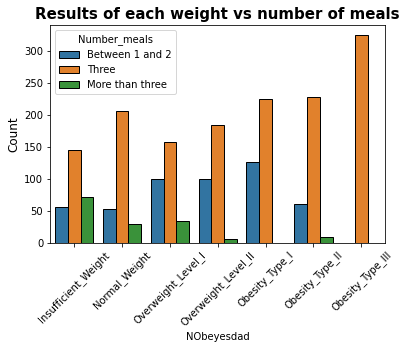

In [56]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'Number_meals', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs number of meals', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Eat between meals vs NObeyesdad

In [57]:
table_6 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['Eat_between_meals'])
table_6

Eat_between_meals,no,Sometimes,Frequently,Always
NObeyesdad,,,,
Insufficient_Weight,3,146,121,2
Normal_Weight,10,159,83,35
Overweight_Level_I,35,236,14,5
Overweight_Level_II,1,270,16,3
Obesity_Type_I,1,338,6,6
Obesity_Type_II,1,293,1,2
Obesity_Type_III,0,323,1,0


In [58]:
chi_eatbet, p_eatbet = p_vals(100, new_data, 300, 'Eat_between_meals')
print(chi_eatbet, p_eatbet)

127.13651292607763 5.137892992081569e-10


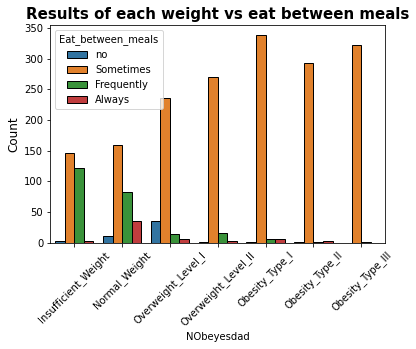

In [59]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'Eat_between_meals', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs eat between meals', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Smoke vs NObeyesdad

In [60]:
table_7 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['Smoke'])
table_7

Smoke,no,yes
NObeyesdad,,
Insufficient_Weight,271,1
Normal_Weight,274,13
Overweight_Level_I,287,3
Overweight_Level_II,285,5
Obesity_Type_I,345,6
Obesity_Type_II,282,15
Obesity_Type_III,323,1


In [61]:
chi_smoke, p_smoke = p_vals(100, new_data, 300, 'Smoke')
print(chi_smoke, p_smoke)

9.549887632773657 0.2746985605249915


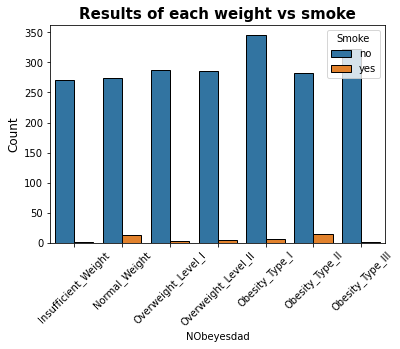

In [62]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'Smoke', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs smoke', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Water vs NObeyesdad

In [63]:
table_8 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['Water'])
table_8

Water,Less than a liter,Between 1 and 2 L,More than 2 L
NObeyesdad,,,
Insufficient_Weight,84,142,46
Normal_Weight,83,164,40
Overweight_Level_I,60,154,76
Overweight_Level_II,47,186,57
Obesity_Type_I,68,173,110
Obesity_Type_II,82,177,38
Obesity_Type_III,61,114,149


In [64]:
chi_water, p_water = p_vals(100, new_data, 300, 'Water')
print(chi_water, p_water)

32.01423137639638 0.018640711325250723


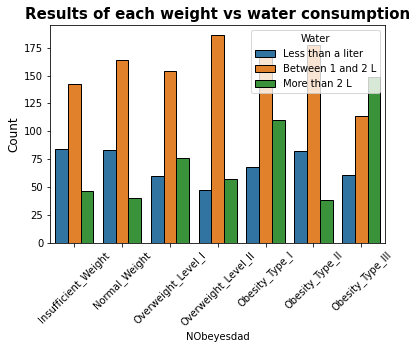

In [65]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'Water', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs water consumption', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Calories monitorization vs NObeyesdad

In [66]:
table_9 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['Calories_monitoring'])
table_9

Calories_monitoring,no,yes
NObeyesdad,,
Insufficient_Weight,250,22
Normal_Weight,257,30
Overweight_Level_I,253,37
Overweight_Level_II,286,4
Obesity_Type_I,349,2
Obesity_Type_II,296,1
Obesity_Type_III,324,0


In [67]:
chi_calmor, p_calmor = p_vals(100, new_data, 300, 'Calories_monitoring')
print(chi_calmor, p_calmor)

21.84711775859365 0.01263789031893997


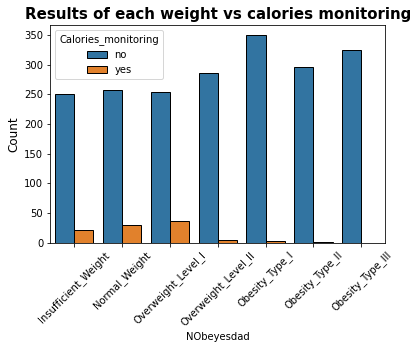

In [68]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'Calories_monitoring', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs calories monitoring', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Exercise vs NObeyesdad

In [69]:
table_10 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['Exercise_time'])
table_10

Exercise_time,I do not have,1 or 2 days,2 or 4 days,4 or 5 days
NObeyesdad,,,,
Insufficient_Weight,72,72,117,11
Normal_Weight,80,97,69,41
Overweight_Level_I,84,126,56,24
Overweight_Level_II,97,125,50,18
Obesity_Type_I,131,123,72,25
Obesity_Type_II,69,165,63,0
Obesity_Type_III,187,68,69,0


In [70]:
chi_exercise, p_exercise = p_vals(100, new_data, 300, 'Exercise_time')
print(chi_exercise, p_exercise)

53.35746279887654 0.003028441328544092


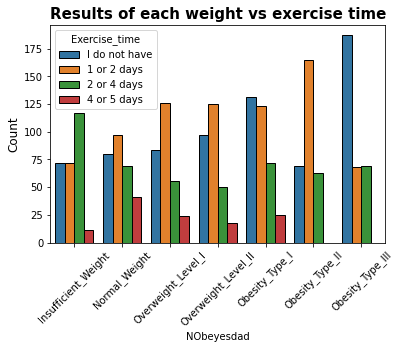

In [71]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'Exercise_time', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs exercise time', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Technologies vs NObeyesdad

In [72]:
table_11 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['Technologies_time'])
table_11

Technologies_time,0-2 hours,3-5 hours,More than 5 hours
NObeyesdad,,,
Insufficient_Weight,94,127,51
Normal_Weight,129,122,36
Overweight_Level_I,164,82,44
Overweight_Level_II,114,145,31
Obesity_Type_I,169,121,61
Obesity_Type_II,173,103,21
Obesity_Type_III,109,215,0


In [73]:
chi_tech, p_tech = p_vals(100, new_data, 300, 'Technologies_time')
print(chi_tech, p_tech)

35.11052543464272 0.005128547889429022


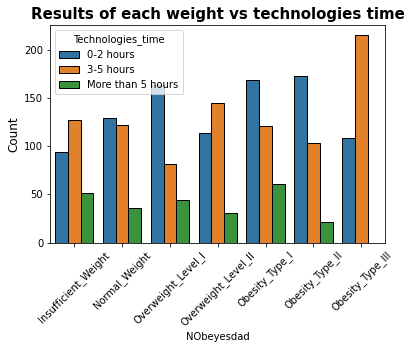

In [74]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'Technologies_time', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs technologies time', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Alcohol vs NObeyesdad

In [75]:
table_12 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['Alcohol'])
table_12

Alcohol,no,Sometimes,Frequently,Always
NObeyesdad,,,,
Insufficient_Weight,117,154,1,0
Normal_Weight,107,161,18,1
Overweight_Level_I,50,224,16,0
Overweight_Level_II,128,143,19,0
Obesity_Type_I,165,172,14,0
Obesity_Type_II,71,224,2,0
Obesity_Type_III,1,323,0,0


In [76]:
chi_alcohol, p_alcohol = p_vals(100, new_data, 300, 'Alcohol')
print(chi_alcohol, p_alcohol)

56.315228198349814 5.142558951172681e-06


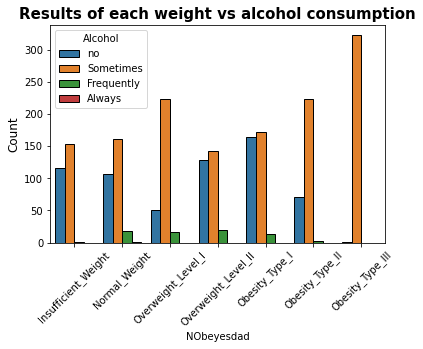

In [77]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'Alcohol', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs alcohol consumption', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Transport vs NObeyesdad

In [78]:
table_13 = pd.crosstab(index = new_data.iloc[:, -1], columns = new_data['Transport_way'])
table_13

Transport_way,Automobile,Public_Transportation,Walking
NObeyesdad,,,
Insufficient_Weight,46,220,6
Normal_Weight,51,200,36
Overweight_Level_I,67,212,11
Overweight_Level_II,95,189,6
Obesity_Type_I,113,236,2
Obesity_Type_II,95,200,2
Obesity_Type_III,1,323,0


In [79]:
chi_transport, p_transport = p_vals(100, new_data, 300, 'Transport_way')
print(chi_transport, p_transport)

48.9160833374495 0.0006761678973759283


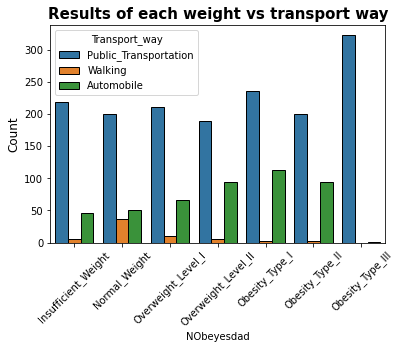

In [80]:
sns.countplot(x = 'NObeyesdad', data = new_data, hue = 'Transport_way', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs transport way', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Age vs NObeyesdad

In [81]:
weight_values = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 
                 'Obesity_Type_II', 'Obesity_Type_III']

for value in weight_values:
  print('Mean age of the group ', value, ' is: ', new_data[new_data['NObeyesdad'] == value]['Age'].mean())

Mean age of the group  Insufficient_Weight  is:  19.783237150735307
Mean age of the group  Normal_Weight  is:  21.738675958188153
Mean age of the group  Overweight_Level_I  is:  23.41767367241378
Mean age of the group  Overweight_Level_II  is:  26.996981424137942
Mean age of the group  Obesity_Type_I  is:  25.88494073219372
Mean age of the group  Obesity_Type_II  is:  28.23378532323232
Mean age of the group  Obesity_Type_III  is:  23.4955539691358


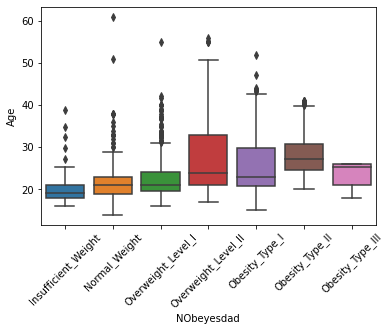

In [82]:
sns.boxplot(x = 'NObeyesdad', y = 'Age', data = new_data)
plt.xticks(rotation = 45)
plt.show()

## p-valores NObeyesdad resume

In [83]:
pvalores = pd.DataFrame({'Feature': data.columns.drop(['Age', 'NObeyesdad', 'Height', 'Weight']),
                         'chi2': [chi_gender, chi_family, chi_high, chi_veg, chi_nummels, chi_eatbet, chi_smoke, chi_water, 
                                  chi_calmor, chi_exercise, chi_tech, chi_alcohol, chi_transport],
                         'p-valor': [p_gender, p_family, p_high, p_veg, p_nummels, p_eatbet, p_smoke, p_water, p_calmor, 
                                     p_exercise, p_tech, p_alcohol, p_transport]})

pvalores.sort_values(by = ['p-valor', 'chi2'], ascending = False)

,Feature,chi2,p-valor
6,Smoke,9.549888,2.746986e-01
7,Water,32.014231,1.864071e-02
8,Calories_monitoring,21.847118,1.263789e-02
10,Technologies_time,35.110525,5.128548e-03
9,Exercise_time,53.357463,3.028441e-03
12,Transport_way,48.916083,6.761679e-04
2,High_cal_food,37.597876,2.373215e-04
11,Alcohol,56.315228,5.142559e-06
4,Number_meals,69.331024,4.481988e-07
5,Eat_between_meals,127.136513,5.137893e-10


# 3 and 4 categories

Let's collapse the target feature in only 4 categories: Infra-weight, Normal-weight, Overweight and Obesity.
Also try only with 3 categories: Infra-Normal weight, Overweight, Obesity.

In [84]:
new_data_2 = new_data.copy()
new_data_2.NObeyesdad = new_data_2.NObeyesdad.apply(lambda x: 'Obesity' if x in ['Obesity_Type_I', 'Obesity_Type_II', 
                                                'Obesity_Type_III'] else ('Overweight' if x in ['Overweight_Level_I', 
                                                'Overweight_Level_II'] else x))
new_data_2['NObeyesdad'] = pd.Categorical(new_data_2['NObeyesdad'], categories = ['Insufficient_Weight', 'Normal_Weight', 
                                        'Overweight', 'Obesity'])
new_data_2

,Gender,Age,Height,Weight,Family_overweight,High_cal_food,Vegetables,Number_meals,Eat_between_meals,Smoke,Water,Calories_monitoring,Exercise_time,Technologies_time,Alcohol,Transport_way,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,I do not have,3-5 hours,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,Always,Three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0-2 hours,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0-2 hours,Frequently,Walking,Overweight
4,Male,22.000000,1.780000,89.800000,no,no,Sometimes,Between 1 and 2,Sometimes,no,Between 1 and 2 L,no,I do not have,0-2 hours,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Sometimes,Public_Transportation,Obesity
2107,Female,21.982942,1.748584,133.742943,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity
2108,Female,22.524036,1.752206,133.689352,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity
2109,Female,24.361936,1.739450,133.346641,yes,yes,Always,Three,Sometimes,no,More than 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity


In [85]:
new_data_3 = new_data.copy()
new_data_3.NObeyesdad = new_data_3.NObeyesdad.apply(lambda x: 'Obesity' if x in ['Obesity_Type_I', 'Obesity_Type_II', 
                                                    'Obesity_Type_III'] else ('Overweight' if x in ['Overweight_Level_I', 
                                                    'Overweight_Level_II'] else 'Infra-Normal'))
new_data_3['NObeyesdad'] = pd.Categorical(new_data_3['NObeyesdad'], categories = ['Infra-Normal', 'Overweight', 'Obesity'])
new_data_3

,Gender,Age,Height,Weight,Family_overweight,High_cal_food,Vegetables,Number_meals,Eat_between_meals,Smoke,Water,Calories_monitoring,Exercise_time,Technologies_time,Alcohol,Transport_way,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,I do not have,3-5 hours,no,Public_Transportation,Infra-Normal
1,Female,21.000000,1.520000,56.000000,yes,no,Always,Three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0-2 hours,Sometimes,Public_Transportation,Infra-Normal
2,Male,23.000000,1.800000,77.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Frequently,Public_Transportation,Infra-Normal
3,Male,27.000000,1.800000,87.000000,no,no,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0-2 hours,Frequently,Walking,Overweight
4,Male,22.000000,1.780000,89.800000,no,no,Sometimes,Between 1 and 2,Sometimes,no,Between 1 and 2 L,no,I do not have,0-2 hours,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Sometimes,Public_Transportation,Obesity
2107,Female,21.982942,1.748584,133.742943,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity
2108,Female,22.524036,1.752206,133.689352,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity
2109,Female,24.361936,1.739450,133.346641,yes,yes,Always,Three,Sometimes,no,More than 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity


## Univariant NObeyesdad

Let's see now the target feature.

### 4 categories

In [86]:
new_obesidad = new_data_2['NObeyesdad']
print(np.unique(new_obesidad))

new_obesidad_counts = pd.DataFrame(new_obesidad.value_counts()).reset_index().reindex([3, 2, 1, 0])
new_obesidad_counts = new_obesidad_counts.rename(columns = {'index': 'Category', 'NObeyesdad': 'Count'})

new_obesidad_counts

['Insufficient_Weight' 'Normal_Weight' 'Obesity' 'Overweight']


,Category,Count
3,Insufficient_Weight,272
2,Normal_Weight,287
1,Overweight,580
0,Obesity,972


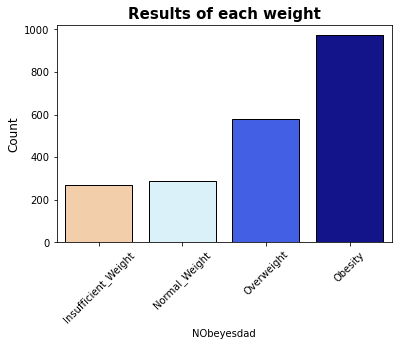

In [87]:
sns.countplot(x = "NObeyesdad", data = new_data_2, palette = "flag", edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### 3 categories

In [88]:
new_obesidad = new_data_3['NObeyesdad']
print(np.unique(new_obesidad))

new_obesidad_counts = pd.DataFrame(new_obesidad.value_counts()).reset_index().reindex([2, 1, 0])
new_obesidad_counts = new_obesidad_counts.rename(columns = {'index': 'Peso', 'NObeyesdad': 'Cuentas'})

new_obesidad_counts

['Infra-Normal' 'Obesity' 'Overweight']


,Peso,Cuentas
2,Infra-Normal,559
1,Overweight,580
0,Obesity,972


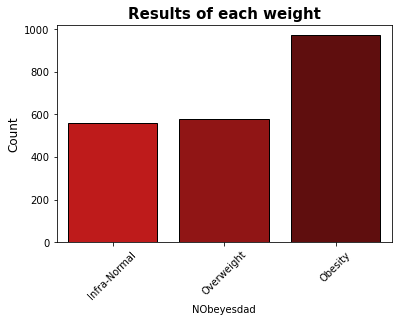

In [89]:
sns.countplot(x = "NObeyesdad", data = new_data_3, palette = "flag", edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Bivariant analysis

Repeat the bivariant analysis with only 4 categories in the target feature.

### Gender vs NObeyesdad

#### 4 categories

In [90]:
new_table_1 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['Gender'])
new_table_1

Gender,Female,Male
NObeyesdad,,
Insufficient_Weight,173,99
Normal_Weight,141,146
Overweight,248,332
Obesity,481,491


In [91]:
new_val_gender, new_p_gender = p_vals(100, new_data_2, 300, 'Gender')
print(new_val_gender, new_p_gender)

7.087419423079133 0.19778959911893232


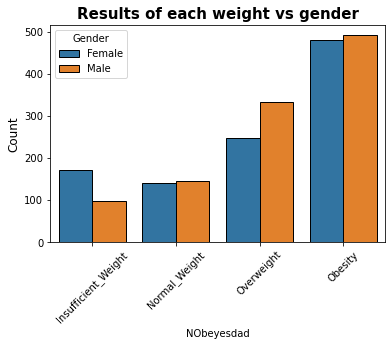

In [92]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'Gender', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs gender', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [93]:
new_table_1 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['Gender'])
new_table_1

Gender,Female,Male
NObeyesdad,,
Infra-Normal,314,245
Overweight,248,332
Obesity,481,491


In [94]:
new_val_gender_2, new_p_gender_2 = p_vals(100, new_data_3, 300, 'Gender')
print(new_val_gender_2, new_p_gender_2)

4.684658160288184 0.22392749659900527


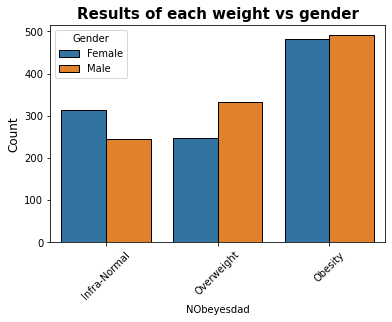

In [95]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'Gender', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs gender', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Family overweight vs NObeyesdad

#### 4 categories

In [96]:
new_table_2 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['Family_overweight'])
new_table_2

Family_overweight,no,yes
NObeyesdad,,
Insufficient_Weight,146,126
Normal_Weight,132,155
Overweight,99,481
Obesity,8,964


In [97]:
new_val_family, new_p_family = p_vals(100, new_data_2, 300, 'Family_overweight')
print(new_val_family, new_p_family)

84.86413903946028 2.2110385300523768e-11


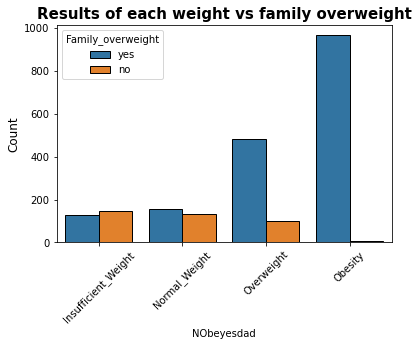

In [98]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'Family_overweight', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs family overweight', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [99]:
new_table_2 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['Family_overweight'])
new_table_2

Family_overweight,no,yes
NObeyesdad,,
Infra-Normal,278,281
Overweight,99,481
Obesity,8,964


In [100]:
new_val_family_2, new_p_family_2 = p_vals(100, new_data_3, 300, 'Family_overweight')
print(new_val_family_2, new_p_family_2)

83.2787209671599 3.349260194920587e-13


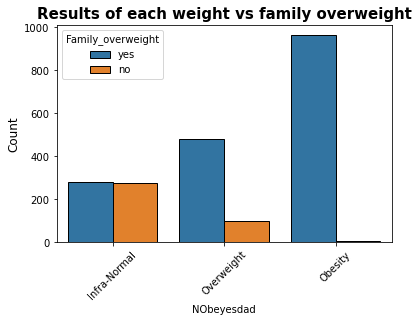

In [101]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'Family_overweight', edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs family overweight', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Hipercaloric food vs NObeyesdad

#### 4 categories

In [102]:
new_table_3 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['High_cal_food'])
new_table_3

High_cal_food,no,yes
NObeyesdad,,
Insufficient_Weight,51,221
Normal_Weight,79,208
Overweight,96,484
Obesity,19,953


In [103]:
new_val_high, new_p_high = p_vals(100, new_data_2, 300, 'High_cal_food')
print(new_val_high, new_p_high)

28.45305572145907 0.00098954026572876


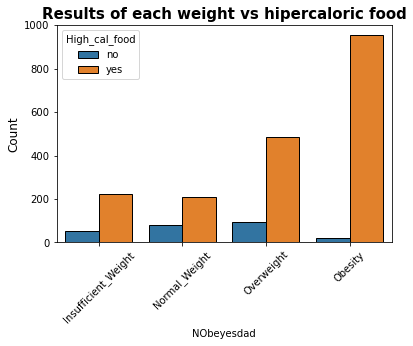

In [104]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'High_cal_food', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs hipercaloric food', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [105]:
new_table_3 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['High_cal_food'])
new_table_3

High_cal_food,no,yes
NObeyesdad,,
Infra-Normal,130,429
Overweight,96,484
Obesity,19,953


In [106]:
new_val_high_2, new_p_high_2 = p_vals(100, new_data_3, 300, 'High_cal_food')
print(new_val_high_2, new_p_high_2)

27.061724784996706 5.011203419874844e-05


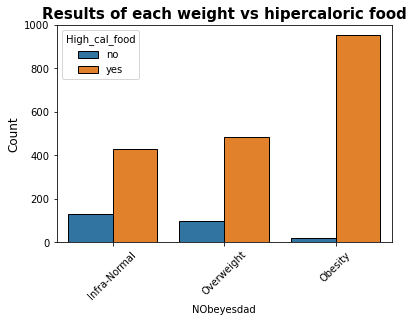

In [107]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'High_cal_food', edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs hipercaloric food', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Vegetables vs NObeyesdad

#### 4 categories

In [108]:
new_table_4 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['Vegetables'])
new_table_4

Vegetables,Never,Sometimes,Always
NObeyesdad,,,
Insufficient_Weight,23,86,163
Normal_Weight,18,155,114
Overweight,23,378,179
Obesity,38,394,540


In [109]:
new_veg_vale, new_p_veg = p_vals(100, new_data_2, 300, 'Vegetables')
print(new_veg_vale, new_p_veg)

26.035370278130635 0.011669831709685868


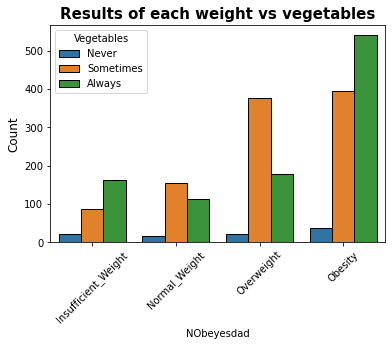

In [110]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'Vegetables', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs vegetables', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [111]:
new_table_4 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['Vegetables'])
new_table_4

Vegetables,Never,Sometimes,Always
NObeyesdad,,,
Infra-Normal,41,241,277
Overweight,23,378,179
Obesity,38,394,540


In [112]:
new_veg_vale_2, new_p_veg_2 = p_vals(100, new_data_3, 300, 'Vegetables')
print(new_veg_vale_2, new_p_veg_2)

17.686643713174437 0.023157442792013136


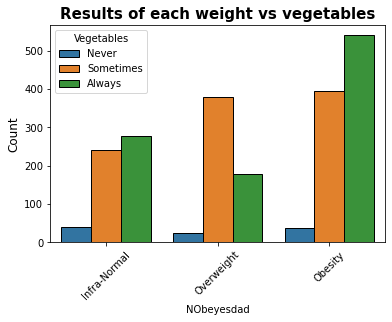

In [113]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'Vegetables', edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs vegetables', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Number of meals vs NObeyesdad

#### 4 categories

In [114]:
new_table_5 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['Number_meals'])
new_table_5

Number_meals,Between 1 and 2,Three,More than three
NObeyesdad,,,
Insufficient_Weight,55,145,72
Normal_Weight,52,206,29
Overweight,199,342,39
Obesity,186,777,9


In [115]:
new_val_num, new_p_nummels = p_vals(100, new_data_2, 300, 'Number_meals')
print(new_val_num, new_p_nummels)

46.363429490441334 0.000289832717250358


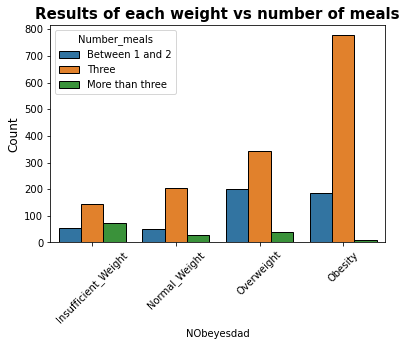

In [116]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'Number_meals', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs number of meals', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [117]:
new_table_5 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['Number_meals'])
new_table_5

Number_meals,Between 1 and 2,Three,More than three
NObeyesdad,,,
Infra-Normal,107,351,101
Overweight,199,342,39
Obesity,186,777,9


In [118]:
new_val_num_2, new_p_nummels_2 = p_vals(100, new_data_3, 300, 'Number_meals')
print(new_val_num_2, new_p_nummels_2)

32.97652323110332 0.00017812733643781525


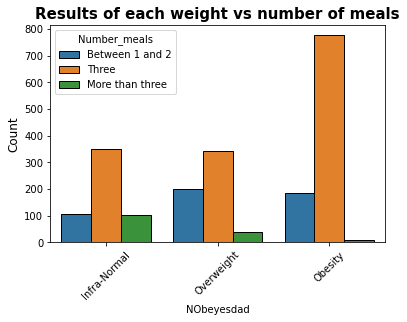

In [119]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'Number_meals', edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs number of meals', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Eat between vs NObeyesdad

#### 4 categories

In [120]:
new_table_6 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['Eat_between_meals'])
new_table_6

Eat_between_meals,no,Sometimes,Frequently,Always
NObeyesdad,,,,
Insufficient_Weight,3,146,121,2
Normal_Weight,10,159,83,35
Overweight,36,506,30,8
Obesity,2,954,8,8


In [121]:
new_val_eta, new_p_eatbet = p_vals(100, new_data_2, 300, 'Eat_between_meals')
print(new_val_eta, new_p_eatbet)

109.1839683271061 1.0618034235777546e-11


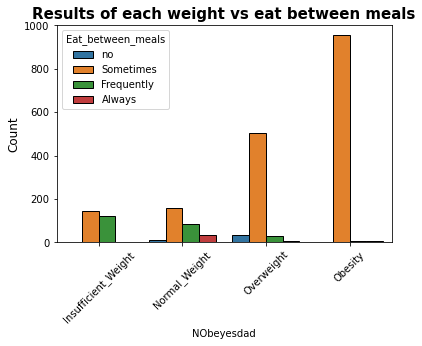

In [122]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'Eat_between_meals', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs eat between meals', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [123]:
new_table_6 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['Eat_between_meals'])
new_table_6

Eat_between_meals,no,Sometimes,Frequently,Always
NObeyesdad,,,,
Infra-Normal,13,305,204,37
Overweight,36,506,30,8
Obesity,2,954,8,8


In [124]:
new_val_eta_2, new_p_eatbet_2 = p_vals(100, new_data_3, 300, 'Eat_between_meals')
print(new_val_eta_2, new_p_eatbet_2)

89.56043721328446 1.8485708714371365e-11


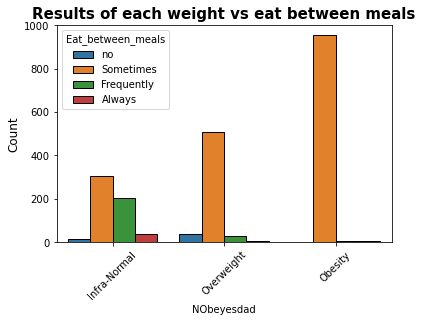

In [125]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'Eat_between_meals', edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs eat between meals', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Smoke vs NObeyesdad

#### 4 categories

In [126]:
new_table_7 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['Smoke'])
new_table_7

Smoke,no,yes
NObeyesdad,,
Insufficient_Weight,271,1
Normal_Weight,274,13
Overweight,572,8
Obesity,950,22


In [127]:
new_val_smoke, new_p_smoke = p_vals(100, new_data_2, 300, 'Smoke')
print(new_val_smoke, new_p_smoke)

4.740548698484446 0.34265092363066185


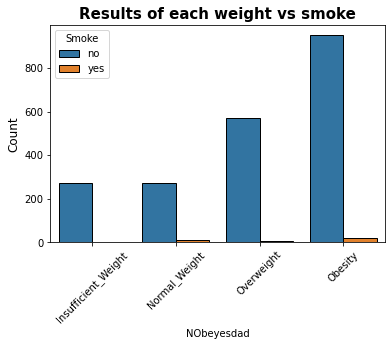

In [128]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'Smoke', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs smoke', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [129]:
new_table_7 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['Smoke'])
new_table_7

Smoke,no,yes
NObeyesdad,,
Infra-Normal,545,14
Overweight,572,8
Obesity,950,22


In [130]:
new_val_smoke_2, new_p_smoke_2 = p_vals(100, new_data_3, 300, 'Smoke')
print(new_val_smoke_2, new_p_smoke_2)

2.034815914082653 0.4687556548493482


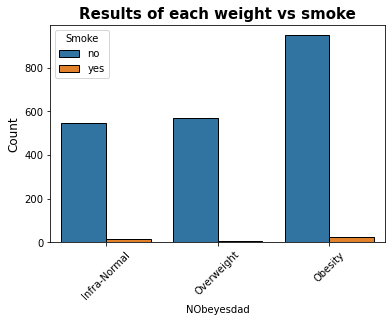

In [131]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'Smoke', edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs smoke', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Water vs NObeyesdad

#### 4 categories

In [132]:
new_table_8 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['Water'])
new_table_8

Water,Less than a liter,Between 1 and 2 L,More than 2 L
NObeyesdad,,,
Insufficient_Weight,84,142,46
Normal_Weight,83,164,40
Overweight,107,340,133
Obesity,211,464,297


In [133]:
new_val_water, new_p_water = p_vals(100, new_data_2, 300, 'Water')
print(new_val_water, new_p_water)

13.716389113727077 0.11080509872656463


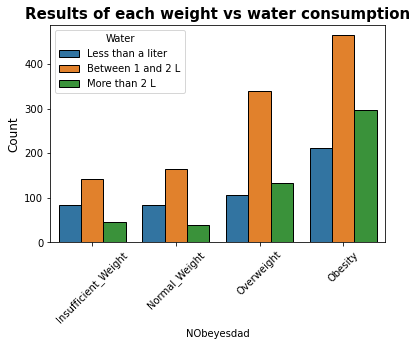

In [134]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'Water', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs water consumption', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [135]:
new_table_8 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['Water'])
new_table_8

Water,Less than a liter,Between 1 and 2 L,More than 2 L
NObeyesdad,,,
Infra-Normal,167,306,86
Overweight,107,340,133
Obesity,211,464,297


In [136]:
new_val_water_2, new_p_water_2 = p_vals(100, new_data_3, 300, 'Water')
print(new_val_water_2, new_p_water_2)

10.735863687674073 0.11512867186855637


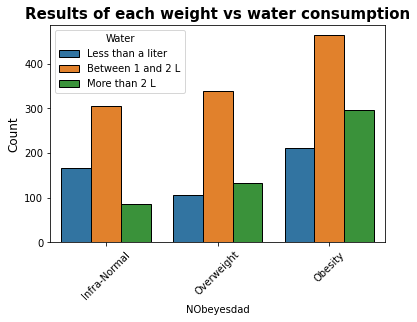

In [137]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'Water', edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs water consumption', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Calories monitorization vs NObeyesdad

#### 4 categories

In [138]:
new_table_9 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['Calories_monitoring'])
new_table_9

Calories_monitoring,no,yes
NObeyesdad,,
Insufficient_Weight,250,22
Normal_Weight,257,30
Overweight,539,41
Obesity,969,3


In [139]:
new_val_calmor, new_p_calmor = p_vals(100, new_data_2, 300, 'Calories_monitoring')
print(new_val_calmor, new_p_calmor)

14.156315638448362 0.0130108108709532


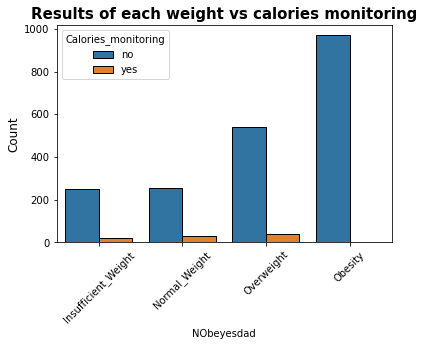

In [140]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'Calories_monitoring', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs calories monitoring', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [141]:
new_table_9 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['Calories_monitoring'])
new_table_9

Calories_monitoring,no,yes
NObeyesdad,,
Infra-Normal,507,52
Overweight,539,41
Obesity,969,3


In [142]:
new_val_calmor_2, new_p_calmor_2 = p_vals(100, new_data_3, 300, 'Calories_monitoring')
print(new_val_calmor_2, new_p_calmor_2)

13.112400671653564 0.010806962316097598


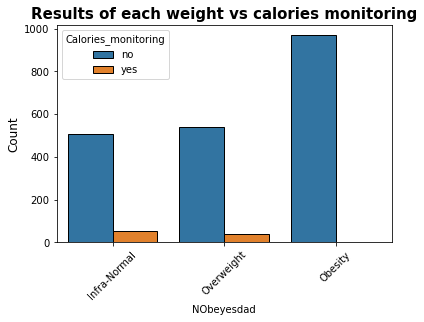

In [143]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'Calories_monitoring', edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs calories monitoring', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Exercise vs NObeyesdad

#### 4 categories

In [144]:
new_table_10 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['Exercise_time'])
new_table_10

Exercise_time,I do not have,1 or 2 days,2 or 4 days,4 or 5 days
NObeyesdad,,,,
Insufficient_Weight,72,72,117,11
Normal_Weight,80,97,69,41
Overweight,181,251,106,42
Obesity,387,356,204,25


In [145]:
new_val_exer, new_p_exercise = p_vals(100, new_data_2, 300, 'Exercise_time')
print(new_val_exer, new_p_exercise)

28.095571712917902 0.028767901307978086


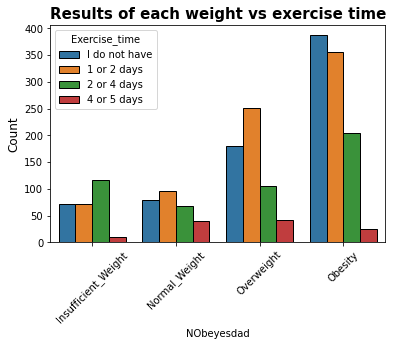

In [146]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'Exercise_time', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs exercise time', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [147]:
new_table_10 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['Exercise_time'])
new_table_10

Exercise_time,I do not have,1 or 2 days,2 or 4 days,4 or 5 days
NObeyesdad,,,,
Infra-Normal,152,169,186,52
Overweight,181,251,106,42
Obesity,387,356,204,25


In [148]:
new_val_exer_2, new_p_exercise_2 = p_vals(100, new_data_3, 300, 'Exercise_time')
print(new_val_exer_2, new_p_exercise_2)

20.281911487216945 0.033489560449302756


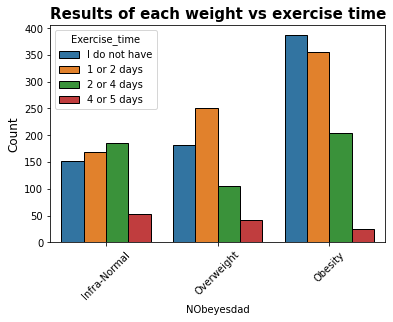

In [149]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'Exercise_time', edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs exercise time', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Technologies vs NObeyesdad

#### 4 categories

In [150]:
new_table_11 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['Technologies_time'])
new_table_11

Technologies_time,0-2 hours,3-5 hours,More than 5 hours
NObeyesdad,,,
Insufficient_Weight,94,127,51
Normal_Weight,129,122,36
Overweight,278,227,75
Obesity,451,439,82


In [151]:
new_val_tech, new_p_tech = p_vals(100, new_data_2, 300, 'Technologies_time')
print(new_val_tech, new_p_tech)

10.4036262629749 0.2421406174729931


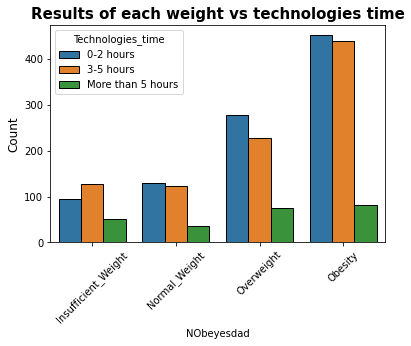

In [152]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'Technologies_time', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs technologies time', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [153]:
new_table_11 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['Technologies_time'])
new_table_11

Technologies_time,0-2 hours,3-5 hours,More than 5 hours
NObeyesdad,,,
Infra-Normal,223,249,87
Overweight,278,227,75
Obesity,451,439,82


In [154]:
new_val_tech_2, new_p_tech_2 = p_vals(100, new_data_3, 300, 'Technologies_time')
print(new_val_tech_2, new_p_tech_2)

6.351356215889947 0.3031014524447821


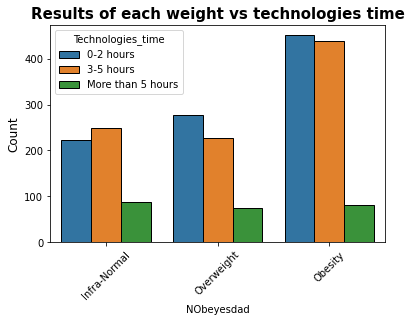

In [155]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'Technologies_time', edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs technologies time', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Alcohol vs NObeyesdad

#### 4 categories

In [156]:
new_table_12 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['Alcohol'])
new_table_12

Alcohol,no,Sometimes,Frequently,Always
NObeyesdad,,,,
Insufficient_Weight,117,154,1,0
Normal_Weight,107,161,18,1
Overweight,178,367,35,0
Obesity,237,719,16,0


In [157]:
new_val_alcohol, new_p_alcohol = p_vals(100, new_data_2, 300, 'Alcohol')
print(new_val_alcohol, new_p_alcohol)

17.958330073547828 0.0646005864511233


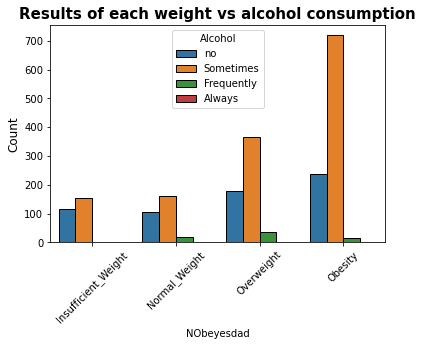

In [158]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'Alcohol', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs alcohol consumption', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [159]:
new_table_12 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['Alcohol'])
new_table_12

Alcohol,no,Sometimes,Frequently,Always
NObeyesdad,,,,
Infra-Normal,224,315,19,1
Overweight,178,367,35,0
Obesity,237,719,16,0


In [160]:
new_val_alcohol_2, new_p_alcohol_2 = p_vals(100, new_data_3, 300, 'Alcohol')
print(new_val_alcohol_2, new_p_alcohol_2)

14.059844291740605 0.052995626478312186


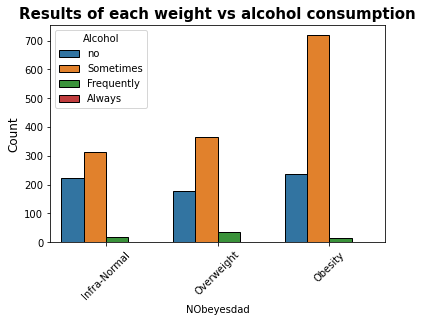

In [161]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'Alcohol', edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs alcohol consumption', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Transport vs NObeyesdad

#### 4 categories

In [162]:
new_table_13 = pd.crosstab(index = new_data_2.iloc[:, -1], columns = new_data_2['Transport_way'])
new_table_13

Transport_way,Automobile,Public_Transportation,Walking
NObeyesdad,,,
Insufficient_Weight,46,220,6
Normal_Weight,51,200,36
Overweight,162,401,17
Obesity,209,759,4


In [163]:
new_val_trans, new_p_transport = p_vals(100, new_data_2, 300, 'Transport_way')
print(new_val_trans, new_p_transport)

23.95622405152767 0.029837658018246074


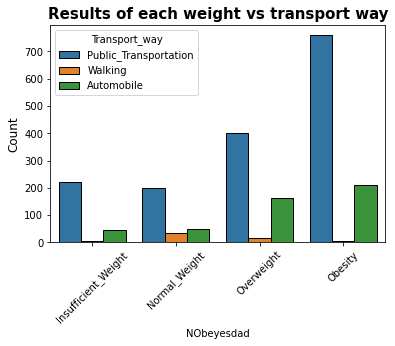

In [164]:
sns.countplot(x = 'NObeyesdad', data = new_data_2, hue = 'Transport_way', edgecolor = "black")

plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs transport way', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [165]:
new_table_13 = pd.crosstab(index = new_data_3.iloc[:, -1], columns = new_data_3['Transport_way'])
new_table_13

Transport_way,Automobile,Public_Transportation,Walking
NObeyesdad,,,
Infra-Normal,97,420,42
Overweight,162,401,17
Obesity,209,759,4


In [166]:
new_val_trans_2, new_p_transport_2 = p_vals(100, new_data_3, 300, 'Transport_way')
print(new_val_trans_2, new_p_transport_2)

14.58305719884378 0.05926494334207627


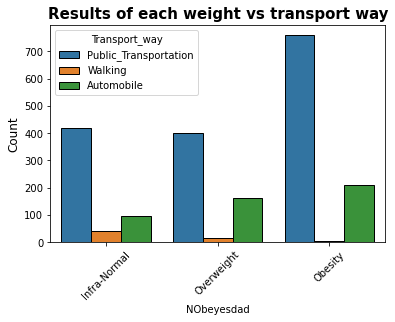

In [167]:
sns.countplot(x = 'NObeyesdad', data = new_data_3, hue = 'Transport_way', edgecolor = "black")
plt.ylabel('Count', fontsize = 12)
plt.title('Results of each weight vs transport way', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Age vs NObeyesdad

#### 4 categories

In [168]:
weight_values = ['Insufficient_Weight', 'Normal_Weight', 'Overweight', 'Obesity']

for value in weight_values:
  print('Mean age of the group ', value, ' is: ', new_data_2[new_data_2['NObeyesdad'] == value]['Age'].mean())

Mean age of the group  Insufficient_Weight  is:  19.783237150735307
Mean age of the group  Normal_Weight  is:  21.738675958188153
Mean age of the group  Overweight  is:  25.20732754827586
Mean age of the group  Obesity  is:  25.806180991769548


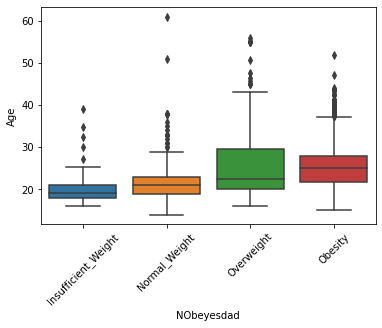

In [169]:
sns.boxplot(x = 'NObeyesdad', y = 'Age', data = new_data_2)
plt.xticks(rotation = 45)
plt.show()

#### 3 categories

In [170]:
weight_values = ['Infra-Normal', 'Overweight', 'Obesity']

for value in weight_values:
  print('Mean age of the group ', value, ' is: ', new_data_3[new_data_3['NObeyesdad'] == value]['Age'].mean())

Mean age of the group  Infra-Normal  is:  20.78719231663684
Mean age of the group  Overweight  is:  25.20732754827586
Mean age of the group  Obesity  is:  25.806180991769548


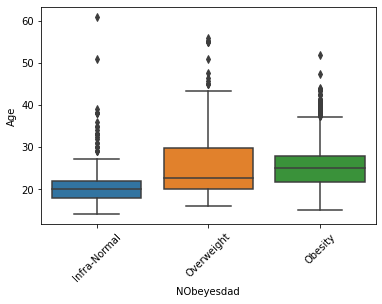

In [171]:
sns.boxplot(x = 'NObeyesdad', y = 'Age', data = new_data_3)
plt.xticks(rotation = 45)
plt.show()

### p-values resume

#### 4 categories

In [172]:
new_pvalores = pd.DataFrame({'Feature': data.columns.drop(['Age', 'NObeyesdad', 'Height', 'Weight']),
                             'chi2': [new_val_gender, new_val_family, new_val_high, new_veg_vale, new_val_num, new_val_eta,
                                      new_val_smoke, new_val_water, new_val_calmor, new_val_exer, new_val_tech, 
                                      new_val_alcohol, new_val_trans],
                             'p-valor': [new_p_gender, new_p_family, new_p_high, new_p_veg, new_p_nummels, new_p_eatbet, 
                                         new_p_smoke, new_p_water, new_p_calmor, new_p_exercise, new_p_tech, new_p_alcohol, 
                                         new_p_transport]})

new_pvalores.sort_values(by = ['p-valor', 'chi2'], ascending = False)

,Feature,chi2,p-valor
6,Smoke,4.740549,3.426509e-01
10,Technologies_time,10.403626,2.421406e-01
0,Gender,7.087419,1.977896e-01
7,Water,13.716389,1.108051e-01
11,Alcohol,17.958330,6.460059e-02
12,Transport_way,23.956224,2.983766e-02
9,Exercise_time,28.095572,2.876790e-02
8,Calories_monitoring,14.156316,1.301081e-02
3,Vegetables,26.035370,1.166983e-02
2,High_cal_food,28.453056,9.895403e-04


#### 3 categories

In [173]:
new_pvalores_2 = pd.DataFrame({'Feature': data.columns.drop(['Age', 'NObeyesdad', 'Height', 'Weight']),
                             'chi2': [new_val_gender_2, new_val_family_2, new_val_high_2, new_veg_vale_2, new_val_num_2,
                                      new_val_eta_2, new_val_smoke_2, new_val_water_2, new_val_calmor_2, new_val_exer_2,
                                      new_val_tech_2, new_val_alcohol_2, new_val_trans_2],
                             'p-valor': [new_p_gender_2, new_p_family_2, new_p_high_2, new_p_veg_2, new_p_nummels_2,
                                         new_p_eatbet_2, new_p_smoke_2, new_p_water_2, new_p_calmor_2, new_p_exercise_2,
                                         new_p_tech_2, new_p_alcohol_2, new_p_transport_2]})

new_pvalores_2.sort_values(by = ['p-valor', 'chi2'], ascending = False)

,Feature,chi2,p-valor
6,Smoke,2.034816,4.687557e-01
10,Technologies_time,6.351356,3.031015e-01
0,Gender,4.684658,2.239275e-01
7,Water,10.735864,1.151287e-01
12,Transport_way,14.583057,5.926494e-02
11,Alcohol,14.059844,5.299563e-02
9,Exercise_time,20.281911,3.348956e-02
3,Vegetables,17.686644,2.315744e-02
8,Calories_monitoring,13.112401,1.080696e-02
4,Number_meals,32.976523,1.781273e-04


# Errors

Let's see how many rows are wrong categorized according to the body mass index.

In [174]:
new_data_3['IMC'] = data.Weight/(data.Height*data.Height)

theo_class = []
for i in new_data_3.IMC:
  if i <= 24.9:
    theo_class.append('Infra-Normal')
  elif (i <= 29.9) & (i > 24.9):
    theo_class.append('Overweight')
  else:
    theo_class.append('Obesity')

new_data_3['Theoretical_class'] = theo_class
new_data_3

,Gender,Age,Height,Weight,Family_overweight,High_cal_food,Vegetables,Number_meals,Eat_between_meals,Smoke,Water,Calories_monitoring,Exercise_time,Technologies_time,Alcohol,Transport_way,NObeyesdad,IMC,Theoretical_class
0,Female,21.000000,1.620000,64.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,I do not have,3-5 hours,no,Public_Transportation,Infra-Normal,24.386526,Infra-Normal
1,Female,21.000000,1.520000,56.000000,yes,no,Always,Three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0-2 hours,Sometimes,Public_Transportation,Infra-Normal,24.238227,Infra-Normal
2,Male,23.000000,1.800000,77.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Frequently,Public_Transportation,Infra-Normal,23.765432,Infra-Normal
3,Male,27.000000,1.800000,87.000000,no,no,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0-2 hours,Frequently,Walking,Overweight,26.851852,Overweight
4,Male,22.000000,1.780000,89.800000,no,no,Sometimes,Between 1 and 2,Sometimes,no,Between 1 and 2 L,no,I do not have,0-2 hours,Sometimes,Public_Transportation,Overweight,28.342381,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Sometimes,Public_Transportation,Obesity,44.901475,Obesity
2107,Female,21.982942,1.748584,133.742943,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity,43.741923,Obesity
2108,Female,22.524036,1.752206,133.689352,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity,43.543817,Obesity
2109,Female,24.361936,1.739450,133.346641,yes,yes,Always,Three,Sometimes,no,More than 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public_Transportation,Obesity,44.071535,Obesity


First let's see wrong categorizations in the category Infra-Normal weight.

In [175]:
infra = new_data_3[new_data_3.NObeyesdad == 'Infra-Normal']
infra_infra = infra[infra.Theoretical_class == 'Infra-Normal']
infra_overweight = infra[infra.Theoretical_class == 'Overweight']
infra_obesity = infra[infra.Theoretical_class == 'Obesity']

print('Number of rows of Infra-normal weight: ', len(infra))
print('Number of rows of Infra-normal weight categorized as Infra-normal weight: ', len(infra_infra))
print('Number of rows of Infra-normal weight categorized as Overweight: ', len(infra_overweight))
print('Number of rows of Infra-normal weight categorized as Obesity: ', len(infra_obesity))

Number of rows of Infra-normal weight:  559
Number of rows of Infra-normal weight categorized as Infra-normal weight:  558
Number of rows of Infra-normal weight categorized as Overweight:  1
Number of rows of Infra-normal weight categorized as Obesity:  0


Now let's see wrong categorizations in the category Overweight.

In [176]:
over = new_data_3[new_data_3.NObeyesdad == 'Overweight']
over_infra = over[over.Theoretical_class == 'Infra-Normal']
over_overweight = over[over.Theoretical_class == 'Overweight']
over_obesity = over[over.Theoretical_class == 'Obesity']

print('Number of rows of Overweight: ', len(over))
print('Number of rows of Overweight categorized as Infra-normal weight: ', len(over_infra))
print('Number of rows of Overweight categorized as Overweight: ', len(over_overweight))
print('Number of rows of Overweight categorized as Obesity: ', len(over_obesity))

Number of rows of Overweight:  580
Number of rows of Overweight categorized as Infra-normal weight:  9
Number of rows of Overweight categorized as Overweight:  565
Number of rows of Overweight categorized as Obesity:  6


Finally, let's see wrong categorizations in the category Obesity.

In [177]:
obe = new_data_3[new_data_3.NObeyesdad == 'Obesity']
obe_infra = obe[obe.Theoretical_class == 'Infra-Normal']
obe_overweight = obe[obe.Theoretical_class == 'Overweight']
obe_obesity = obe[obe.Theoretical_class == 'Obesity']

print('Number of rows of Obesity: ', len(obe))
print('Number of rows of Obesity categorized as Infra-normal weight: ', len(obe_infra))
print('Number of rows of Obesity categorized as Overweight: ', len(obe_overweight))
print('Number of rows of Obesity categorized as Obesity: ', len(obe_obesity))

Number of rows of Obesity:  972
Number of rows of Obesity categorized as Infra-normal weight:  0
Number of rows of Obesity categorized as Overweight:  0
Number of rows of Obesity categorized as Obesity:  972
